In [10]:
# Quelques imports
import json
import pandas as pd
import matplotlib.pyplot as plt

#Lecture du fichier
file = "Historique des positions raphael 090118.json"
df = pd.read_json(file)
#print(df)

donnee=df.get("locations")
#print(donnee)

#Récupération des latitudes, longitudes et des dates
lat=[]
long=[]
temps=[]

for i in range(len(donnee)):
    lat.append(donnee[i]["latitudeE7"]/1e7)
    long.append(donnee[i]["longitudeE7"]/1e7)
    temps.append(donnee[i]["timestampMs"])

# Get current size
fig_size = plt.rcParams["figure.figsize"]

In [2]:
donnee

0       {'timestampMs': '1515322153641', 'latitudeE7':...
1       {'timestampMs': '1515322000311', 'latitudeE7':...
2       {'timestampMs': '1515228946285', 'latitudeE7':...
3       {'timestampMs': '1515228927570', 'latitudeE7':...
4       {'timestampMs': '1515228886703', 'latitudeE7':...
5       {'timestampMs': '1515228671033', 'latitudeE7':...
6       {'timestampMs': '1515228604090', 'latitudeE7':...
7       {'timestampMs': '1515168273730', 'latitudeE7':...
8       {'timestampMs': '1515168026891', 'latitudeE7':...
9       {'timestampMs': '1515167697913', 'latitudeE7':...
10      {'timestampMs': '1515167474310', 'latitudeE7':...
11      {'timestampMs': '1515167402610', 'latitudeE7':...
12      {'timestampMs': '1515167011140', 'latitudeE7':...
13      {'timestampMs': '1515166950676', 'latitudeE7':...
14      {'timestampMs': '1515166801141', 'latitudeE7':...
15      {'timestampMs': '1515166205180', 'latitudeE7':...
16      {'timestampMs': '1515165838466', 'latitudeE7':...
17      {'time

In [3]:
lat

[50.7174493,
 50.7155988,
 50.7173762,
 50.7174234,
 50.7174173,
 50.7174092,
 50.7149181,
 50.7173852,
 50.7180444,
 50.7161788,
 50.7170931,
 50.7176845,
 50.720897,
 50.7212511,
 50.7198803,
 50.7198803,
 50.7198803,
 50.7182117,
 50.7181183,
 50.7180117,
 50.7177767,
 50.7177,
 50.7177287,
 50.7173956,
 50.7155988,
 50.7155988,
 50.7153147,
 50.7174254,
 50.7173633,
 50.717468,
 50.7174689,
 50.7174192,
 50.7173806,
 50.7174031,
 50.717386,
 50.7173866,
 50.7173921,
 50.7174396,
 50.7174209,
 50.7174059,
 50.7174214,
 50.7173933,
 50.717345,
 50.71746,
 50.7174867,
 50.7174617,
 50.7174533,
 50.7175083,
 50.717555,
 50.7175317,
 50.7174217,
 50.7174083,
 50.7174533,
 50.7174313,
 50.7174337,
 50.7174335,
 50.7174341,
 50.7174039,
 50.717409,
 50.7174225,
 50.7174273,
 50.7174187,
 50.7174193,
 50.7174036,
 50.7174036,
 50.7174339,
 50.7174289,
 50.7174394,
 50.717413,
 50.7155988,
 50.7174146,
 50.7174163,
 50.7174063,
 50.7174212,
 50.7174167,
 50.7174234,
 50.7155988,
 50.7174312

In [4]:
long

[3.1602149,
 3.1625971,
 3.1599107,
 3.1601812,
 3.1601666,
 3.1601409,
 3.163019,
 3.1601502,
 3.1574232,
 3.1531588,
 3.1557024,
 3.1565011,
 3.1597391,
 3.1633617,
 3.1604183,
 3.1604183,
 3.1604183,
 3.1605033,
 3.160405,
 3.160465,
 3.16083,
 3.1608833,
 3.1607999,
 3.1601804,
 3.1625971,
 3.1625971,
 3.1629632,
 3.16015,
 3.1599128,
 3.1602263,
 3.1602084,
 3.1601716,
 3.1600835,
 3.160107,
 3.1601493,
 3.1601332,
 3.1601409,
 3.1601711,
 3.1601695,
 3.1601234,
 3.1601784,
 3.16022,
 3.1602333,
 3.16014,
 3.1601967,
 3.1602,
 3.1601833,
 3.1601933,
 3.1602267,
 3.1602233,
 3.1601733,
 3.1601583,
 3.1601967,
 3.1602223,
 3.1602176,
 3.1602176,
 3.1602178,
 3.1601523,
 3.1601755,
 3.1601967,
 3.1602072,
 3.1601532,
 3.1601851,
 3.1601524,
 3.1601524,
 3.1601774,
 3.1601487,
 3.1602165,
 3.1601658,
 3.1625971,
 3.1602616,
 3.1599341,
 3.1601684,
 3.1601913,
 3.1601501,
 3.1601744,
 3.1625971,
 3.1602224,
 3.1602177,
 3.1602178,
 3.1602173,
 3.160275,
 3.1602178,
 3.1313194,
 3.11953

In [5]:
temps

['1515322153641',
 '1515322000311',
 '1515228946285',
 '1515228927570',
 '1515228886703',
 '1515228671033',
 '1515228604090',
 '1515168273730',
 '1515168026891',
 '1515167697913',
 '1515167474310',
 '1515167402610',
 '1515167011140',
 '1515166950676',
 '1515166801141',
 '1515166205180',
 '1515165838466',
 '1515165820000',
 '1515165804000',
 '1515165786000',
 '1515165771000',
 '1515165755000',
 '1515165732229',
 '1515163202117',
 '1515162638206',
 '1515162557955',
 '1515141111976',
 '1515137631226',
 '1515137584225',
 '1515070107023',
 '1515069850195',
 '1515057722948',
 '1515057597017',
 '1515057575718',
 '1515057536494',
 '1515057436488',
 '1515057336473',
 '1515056876322',
 '1515056476220',
 '1515056296216',
 '1515056016036',
 '1515055854000',
 '1515055834000',
 '1515055814000',
 '1515055794000',
 '1515055774000',
 '1515055754000',
 '1515055734000',
 '1515055714000',
 '1515055694000',
 '1515055675000',
 '1515055655000',
 '1515055635000',
 '1515055614077',
 '1515055595917',
 '15150555

Current size: [13.42, 12.0]


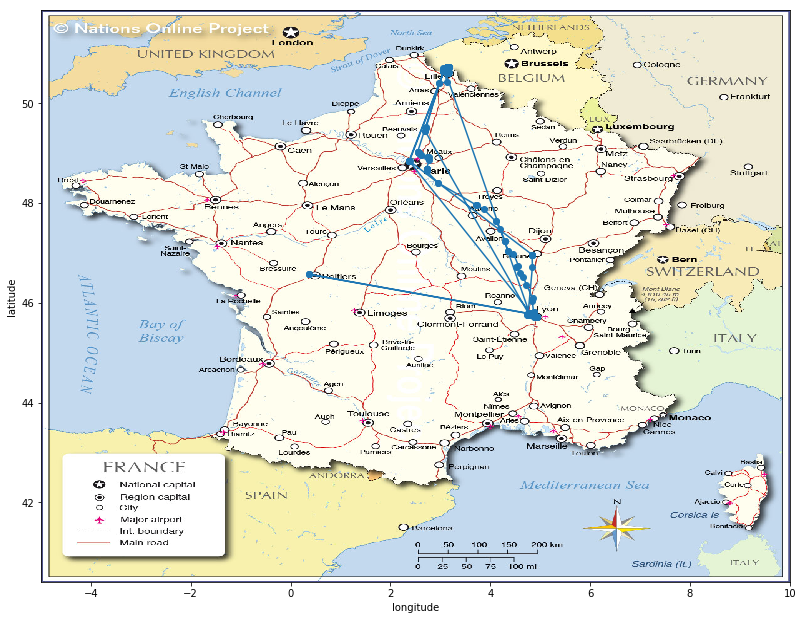

In [21]:
#plt.plot(long,lat)
plt.xlabel('longitude')
plt.ylabel('latitude')

# Get current size
fig_size = plt.rcParams["figure.figsize"]

###############################################################################
#
#   Affichage carte de France
#
###############################################################################

datafile = 'france-political-map.jpg'
img = plt.imread(datafile)

plt.plot(long,lat)

plt.scatter(long,lat,zorder=1)
plt.imshow(img, zorder=0, extent=[-5.0, 10,40.41, 51.86])

#Point bas droite 40.267598, 9.820620
#Point haut gauche 51.727552, -5.219663
#Ordre [left, right, bottom, top]

# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 13.42 and height to 12
fig_size[0] = 13.42
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

# Affichage campus Lyon Ouest + Carrefour

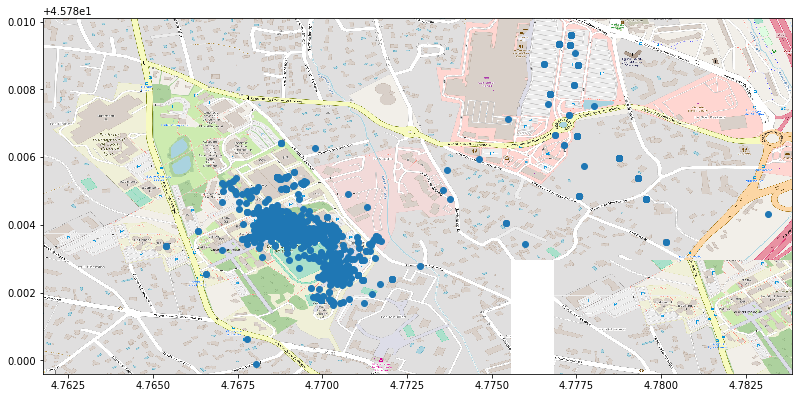

In [22]:
datafile2 = 'carte_centrale_grande.png'
img2 = plt.imread(datafile2)
plt.scatter(long,lat,zorder=1)
plt.imshow(img2,zorder=0,extent = [4.76175,4.78386,45.77960,45.79011])
plt.show()

# Point haut gauche de la carte centrale grande : 45.79011,4.76175
# Point bas : 45.77960,4.77183
# Point droite : 45.78609,4.78386

# Affichage Campus Centrale

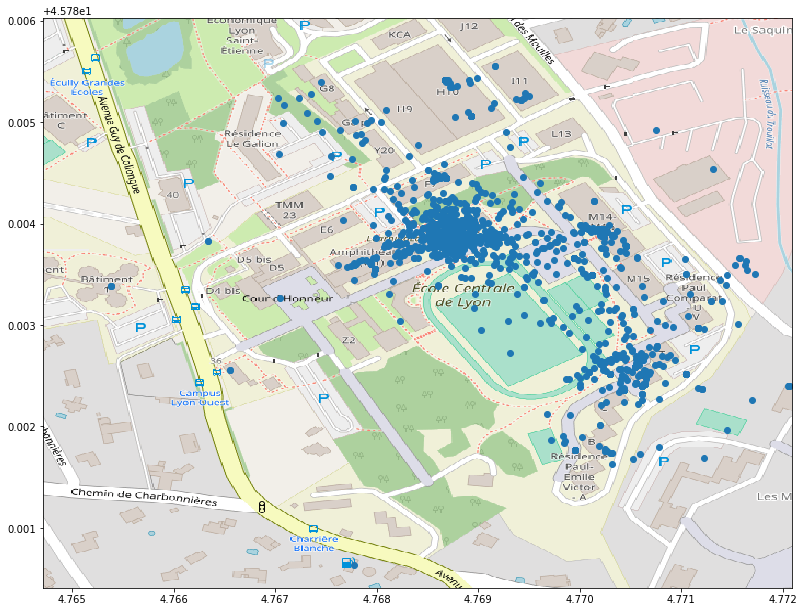

In [23]:
datafile3 = 'carte_centrale_petite.png'
img3 = plt.imread(datafile3)
plt.scatter(long,lat,zorder=1)

## Set figure width to 12 and height to 9
#fig_size[0] = 6.84*1.4
#fig_size[1] = 7.55*1.4
#plt.rcParams["figure.figsize"] = fig_size
#
##plt.axis('normal')
plt.axis.xlim = 7.55*1.4
plt.axis.ylim = 6.84*1.4

plt.imshow(img3,zorder=0,extent = [4.76471,4.77209,45.78041,45.78603])
plt.show()

# Point haut droit carte centrale petite : 45.78603,4.77209
# Point bas gauche carte centrale petite : 45.78041,4.76471